## 1. Data Processing for Machine Learning

### 1.1 Detect and deal with noise, missing values, and outliers

### Locating missing data, replacing them, and eliminating noise

In [ ]:
# Inspecting each column's missing data and counting how many there are using the isna() method.
sample_df.isna().sum()

mileage                    17
reg_code                 3203
standard_colour           551
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     3344
price                       0
body_type                  62
crossover_car_and_van       0
fuel_type                  54
dtype: int64

All the missing value information was provided by the isna() method. According to the output the two columns with the  
most missing values are reg_code and year_of_registration. Initially, I am going to remove noise from the missing
values. To locate and eliminate noise from the dataset I am looking into each column further in detail.

#### `year_of_registration`

In [ ]:
sample_df[(sample_df['year_of_registration'].isna() == True) & (sample_df['vehicle_condition'] == 'NEW')].shape

(3135, 11)

In [ ]:
sample_df['year_of_registration'].max()

2020.0

In [ ]:
sample_df.loc[(sample_df['year_of_registration'].isna() == True) & (sample_df['vehicle_condition'] == 'NEW'), 'year_of_registration'] = 2021.0

sample_df['year_of_registration'].isna().sum()

209

As I can see the latest year of registration for used cars in the dataset is 2020 hence I am setting the value for year of registration of new vehicles as 2021.

After setting registration year of new vehicles the missing values now reduced from 3567 to 211.

To replace the remaining null values in the column 'year_of_registration' we first have to remove all the null values from the 'reg_code' so this section will be contined after replacing null values of 'reg_code'.

#### `reg_code`

In [ ]:
# Finding rows where both the reg_code has missing values and the vehicle condition is not new.
sample_df[(sample_df['reg_code'].isna() == True) & (sample_df['vehicle_condition'] != 'NEW')].shape

(68, 11)

In [ ]:
# Finding rows where both the reg_code has missing values and the vehicle condition is new.
sample_df[(sample_df['reg_code'].isna() == True) & (sample_df['vehicle_condition'] == 'NEW')].shape

(3135, 11)

According to my findings majority of the missing values for the column reg_code are due to the vehicle_condition
being brand-new. Although certain rows where vehicle condition is used have missing values for the field reg_code this
is incorrect. We are unable to correctly determine the reg code for such rows thus we remove them considering as noise.

In [ ]:
# Removing rows for associated reg_code values that have been identified as noise.
sample_df.drop(sample_df[(sample_df['reg_code'].isna() == True) & (sample_df['vehicle_condition'] != 'NEW')].index, inplace=True)

# Replacing the null values in 'reg_code' column where vehicle condition is 'NEW'.
sample_df.loc[(sample_df['reg_code'].isna() == True) & (sample_df['vehicle_condition'] == 'NEW'), 'reg_code'] = '71'

# Printing shape to check if records successfully deleted or not.
sample_df['reg_code'].isna().sum()

0

For all the rows where 'vehicle_condition' is 'NEW' and 'reg_code' has null value I replaced the value of 'reg_code' column with 71 which is the registration code for vehicles registered during the period of 2021 September to 2022 February. As a result all the null values of 'reg_code' has been now replaced with some actual values.

(272, 11)

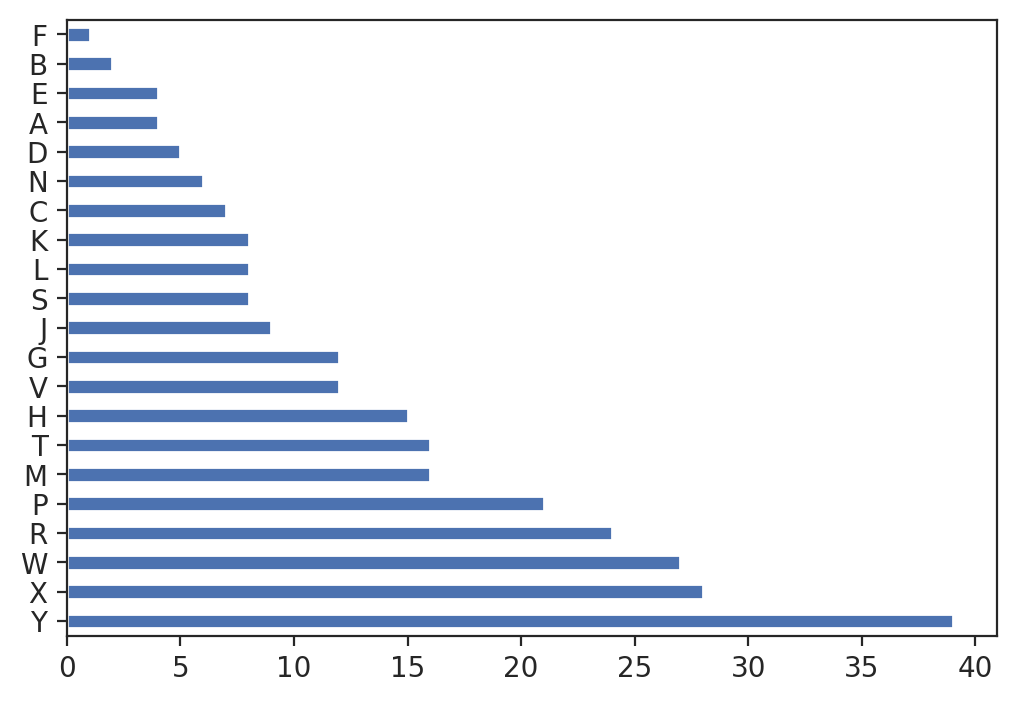

In [ ]:
sample_df[sample_df['reg_code'].str.isdigit() == False]['reg_code'].value_counts().plot(kind='barh')

sample_df[sample_df['reg_code'].str.isdigit() == False].shape

According to the knowledge I have, the meaning of the alphabets in the "reg_code" is unknown; therefore, all the rows with these alphabets were removed as noise.

<Axes: >

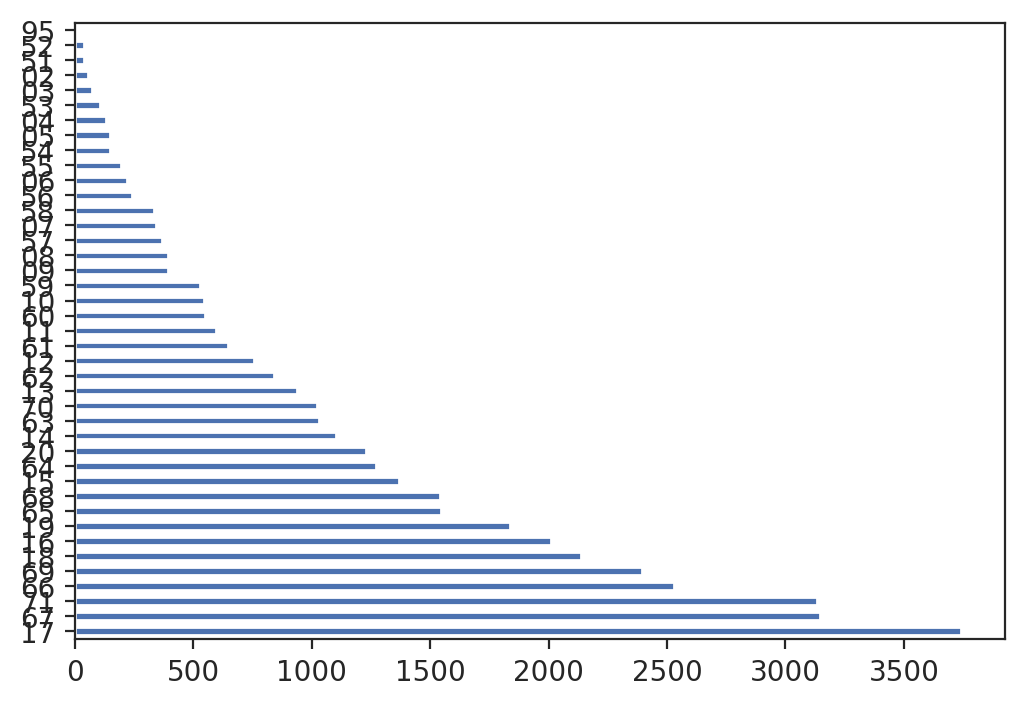

In [ ]:
# Checking for the registration code values which are non numeric and removing them considering as noise.
sample_df.drop(sample_df[sample_df['reg_code'].str.isdigit() == False].index, inplace=True)

# Plotting values of 'reg_code' to see the current registration codes.
sample_df['reg_code'].value_counts().plot(kind='barh')

Now replacing the remaining null values in the cell 'year_of_registration'.

In [ ]:
# Converting the reg_code values to numeric type.
sample_df['reg_code'] = pd.to_numeric(sample_df['reg_code'])

# Replacing null values in 'year_of_registration' base
sample_df['year_of_registration'] = np.where((sample_df['year_of_registration'].isna()) & (sample_df['reg_code'] < 50), 2000 + sample_df['reg_code'],
                                             2000 + sample_df['reg_code'] - 50)

# Finding the sum of null values
sample_df['year_of_registration'].isna().sum()

0

#### `mileage`

In [ ]:
year_mileage_dict = sample_df.groupby('year_of_registration').mean().round(3)['mileage'].to_dict()

for index, row in sample_df[(sample_df['mileage'].isna()) & (sample_df['year_of_registration'].isna() == False)].iterrows():
    sample_df.at[index, 'mileage'] = year_mileage_dict[row['year_of_registration']]

sample_df['mileage'].isna().sum()

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


0

In [ ]:
mode_color = sample_df['standard_colour'].mode()[0]
sample_df['standard_colour'].fillna(mode_color, inplace = True)
sample_df['standard_colour'].isna().sum()

0

In [ ]:
mode_body_type = sample_df['body_type'].mode()[0]
sample_df['body_type'].fillna(mode_body_type, inplace = True)
sample_df['body_type'].isna().sum()

0

In [ ]:
mode_fuel_type = sample_df['fuel_type'].mode()[0]
sample_df['fuel_type'].fillna(mode_fuel_type, inplace = True)
sample_df['fuel_type'].isna().sum()

0

In [ ]:
sample_df.isna().sum()

mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

As I can see above all the missing values now have been successfully removed.

#### Identifying and eliminating outliers

In [ ]:
sample_df.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')

<Axes: ylabel='price'>

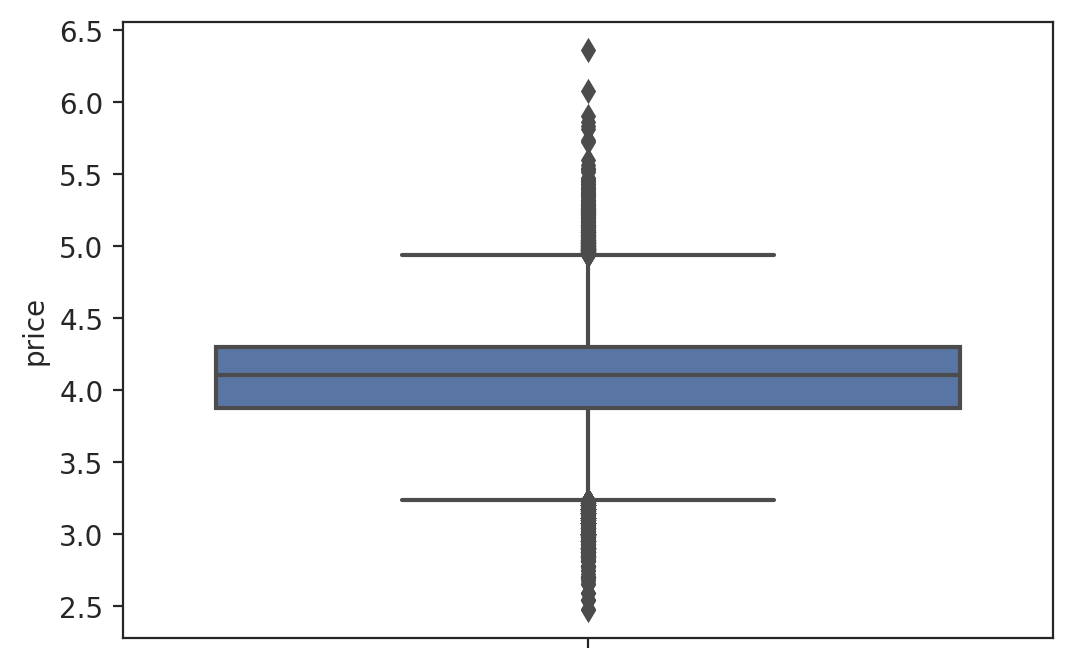

In [ ]:
sns.boxplot(y = np.log10(sample_df['price']))

<Axes: ylabel='mileage'>

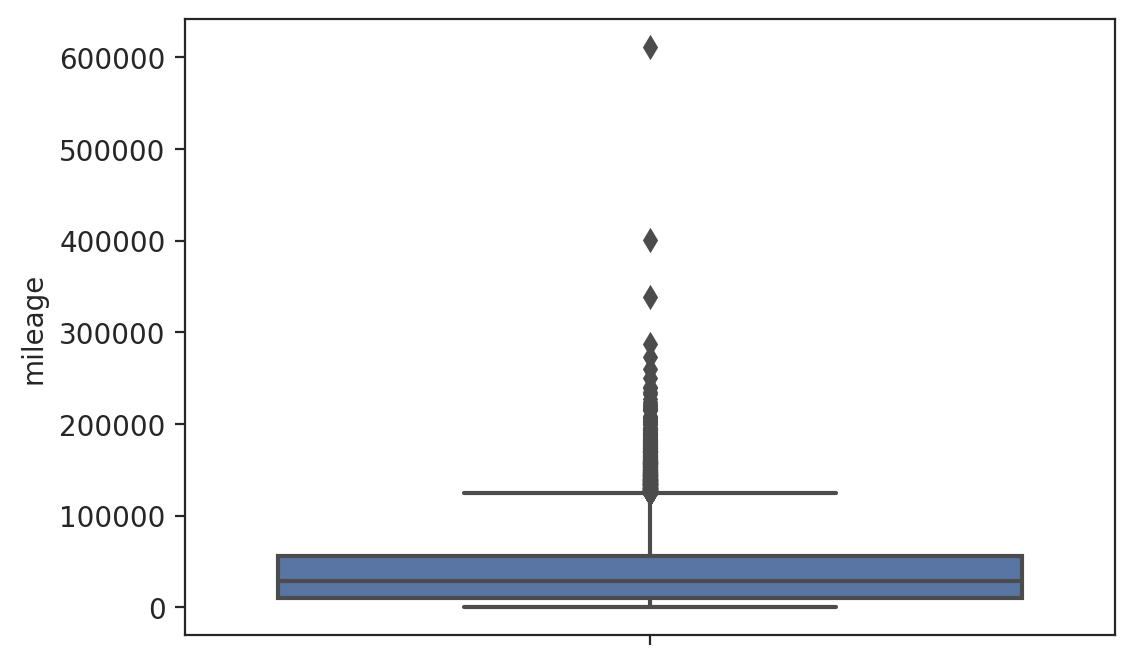

In [ ]:
sns.boxplot(y = sample_df['mileage'])

<Axes: ylabel='reg_code'>

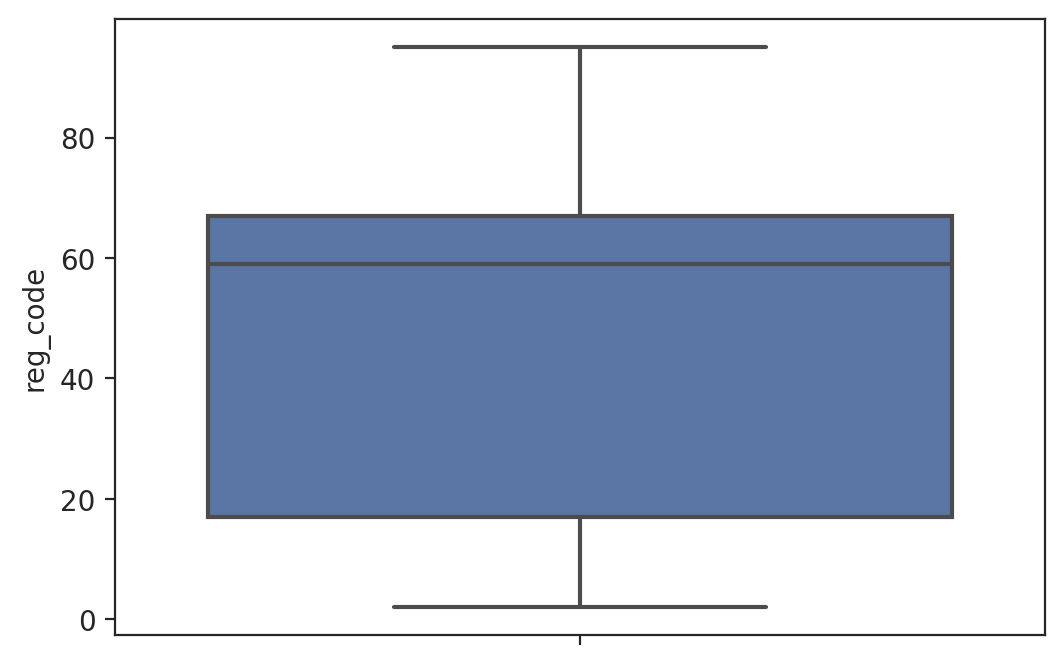

In [ ]:
sns.boxplot(y = sample_df['reg_code'])

<Axes: ylabel='year_of_registration'>

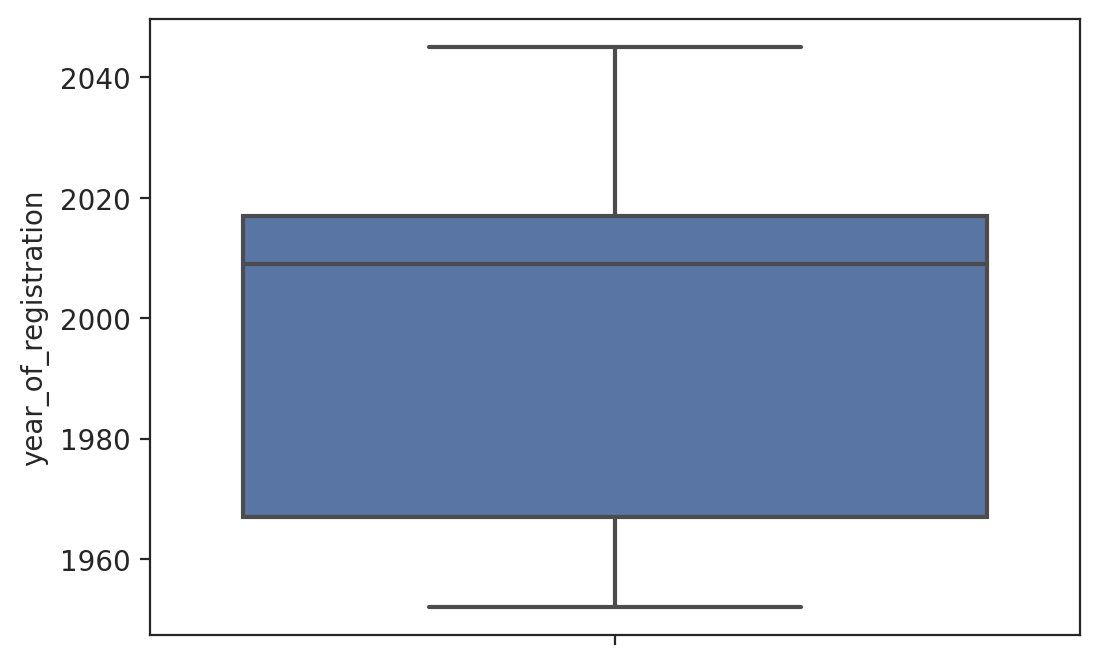

In [ ]:
sns.boxplot(y = sample_df['year_of_registration'])

According to the box plots displayed above I am going to remove outliers from both the columns price and mileage.

#### `price`

<Axes: ylabel='price'>

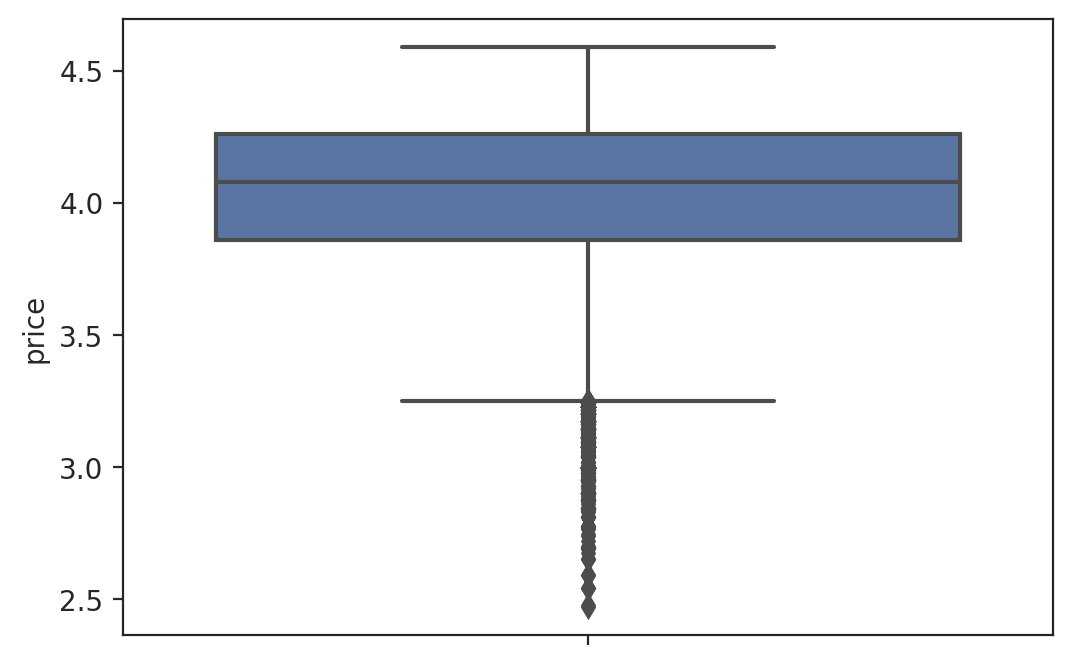

In [ ]:
Q3 = np.quantile(sample_df['price'], 0.75)
Q1 = np.quantile(sample_df['price'], 0.25)
IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
outlier_free_list = [x for x in sample_df['price'] if ( (x > lower_range) & (x < upper_range))]
sample_df = sample_df.loc[sample_df['price'].isin(outlier_free_list)]

sns.boxplot(y = np.log10(sample_df['price']))

#### `Mileage`

divide by zero encountered in log10


<Axes: ylabel='mileage'>

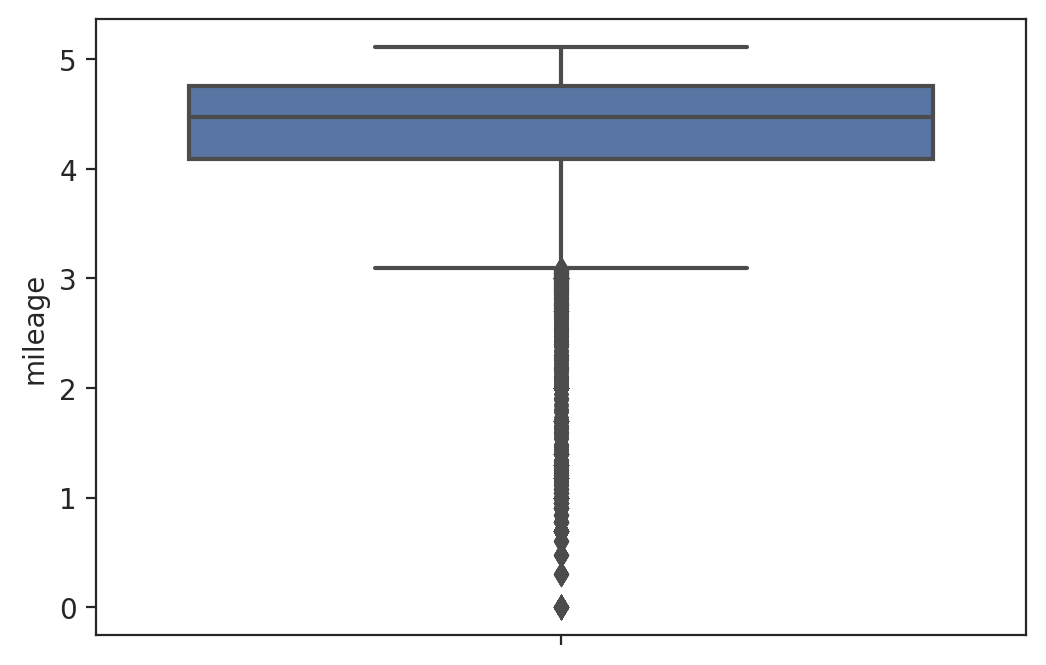

In [ ]:
Q3 = np.quantile(sample_df['mileage'], 0.75)
Q1 = np.quantile(sample_df['mileage'], 0.25)
IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
outlier_free_list = [x for x in sample_df['mileage'] if ( (x > lower_range) & (x < upper_range))]
sample_df = sample_df.loc[sample_df['mileage'].isin(outlier_free_list)]

sns.boxplot(y = np.log10(sample_df['mileage']))

### Catogorical encoding

In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36338 entries, 202003088162968 to 202010265453548
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mileage                36338 non-null  float64
 1   reg_code               36338 non-null  int64  
 2   standard_colour        36338 non-null  object 
 3   standard_make          36338 non-null  object 
 4   standard_model         36338 non-null  object 
 5   vehicle_condition      36338 non-null  object 
 6   year_of_registration   36338 non-null  int64  
 7   price                  36338 non-null  int64  
 8   body_type              36338 non-null  object 
 9   crossover_car_and_van  36338 non-null  bool   
 10  fuel_type              36338 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 3.1+ MB


In the given dataset the categories that requires encoding are :  

1.   standard_colour
2.   standard_make
3.   standard_model
4.   vehicle_condition
5.   body_type
6.   crossover_car_and_van
7.   fuel_type

Here I am using Ordinal encoder to transform categorical features into a numerical format. In ordinal encoding, labels are translated to numbers based on their ordinal relationship to one another.

In [ ]:
# Importing ordinalEncoder
from sklearn.preprocessing import OrdinalEncoder

**`standard_colour`**

In [ ]:
colour_encoder = OrdinalEncoder()
colour_encoder.fit(sample_df[['standard_colour']])

sample_df[['standard_colour']] = colour_encoder.transform(sample_df[['standard_colour']])

sample_df['standard_colour'].sample()

public_reference
202009083461858    6.0
Name: standard_colour, dtype: float64

**`standard_make`**

In [ ]:
make_encoder = OrdinalEncoder()
make_encoder.fit(sample_df[['standard_make']])

sample_df[['standard_make']] = make_encoder.transform(sample_df[['standard_make']])

sample_df['standard_make'].sample()

public_reference
202010114863331    4.0
Name: standard_make, dtype: float64

**`standard_model`**

In [ ]:
model_encoder = OrdinalEncoder()
model_encoder.fit(sample_df[['standard_model']])

sample_df[['standard_model']] = model_encoder.transform(sample_df[['standard_model']])

sample_df['standard_model'].sample()

public_reference
202010205207566    43.0
Name: standard_model, dtype: float64

**`vehicle_condition`**

In [ ]:
sample_df['vehicle_condition'].replace({'USED':0,'NEW': 1}, inplace =True)

sample_df['vehicle_condition'].sample()

public_reference
202010114868104    0
Name: vehicle_condition, dtype: int64

**`body_type`**

In [ ]:
sample_df['body_type'].value_counts()

Hatchback      16369
SUV            10025
Saloon          3179
Estate          2211
Coupe           1774
MPV             1445
Convertible     1252
Pickup            45
Combi Van         14
Minibus            8
Panel Van          6
Limousine          5
Window Van         4
Camper             1
Name: body_type, dtype: int64

In [ ]:
body_encoder = OrdinalEncoder()
body_encoder.fit(sample_df[['body_type']])

sample_df[['body_type']] = body_encoder.transform(sample_df[['body_type']])

sample_df['body_type'].sample()

public_reference
202009304406294    11.0
Name: body_type, dtype: float64

**`crossover_car_and_van`**

In [ ]:
sample_df['crossover_car_and_van'].value_counts()

False    36225
True       113
Name: crossover_car_and_van, dtype: int64

In [ ]:
sample_df['crossover_car_and_van'] = sample_df['crossover_car_and_van'].astype(int)

sample_df['crossover_car_and_van'].sample()

public_reference
202009304422683    0
Name: crossover_car_and_van, dtype: int64

   **`fuel_type`**

<Axes: >

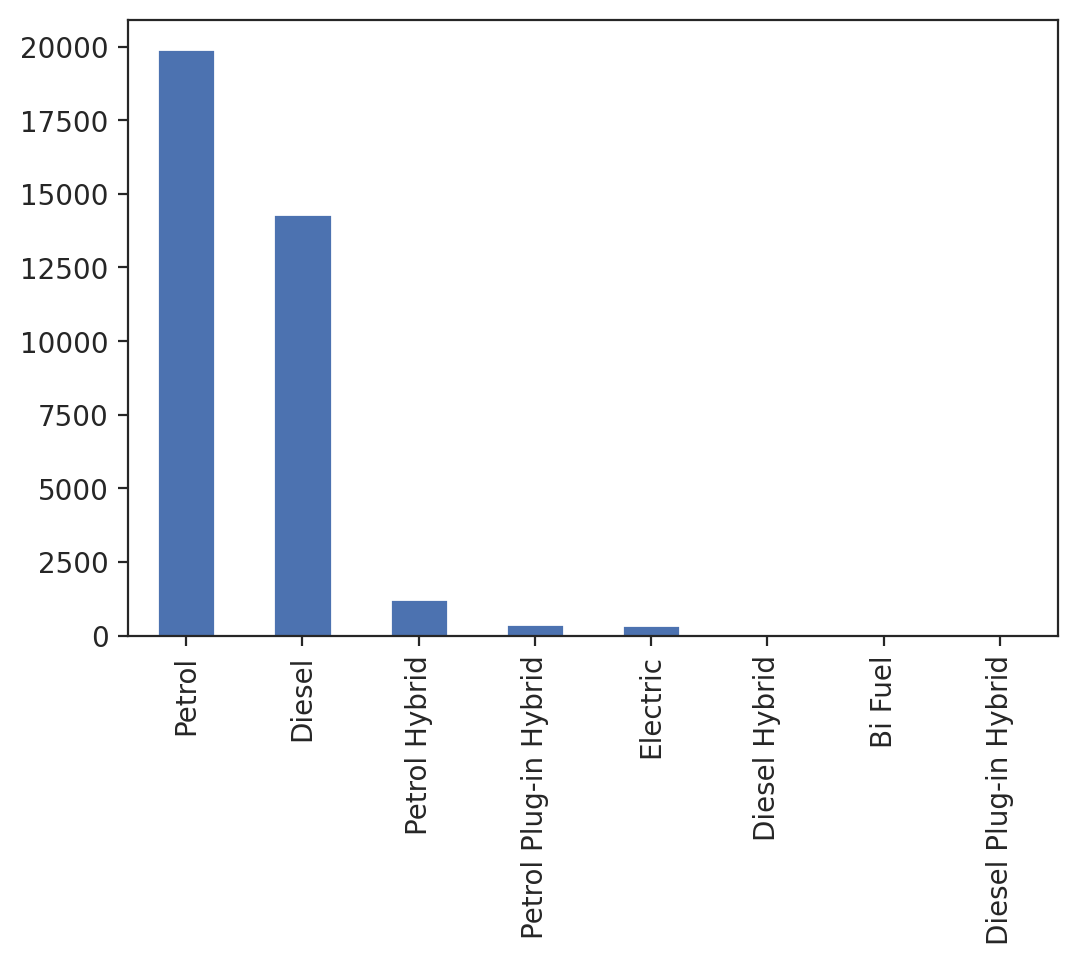

In [ ]:
sample_df['fuel_type'].value_counts().plot(kind='bar')

In [ ]:
sample_df = pd.get_dummies(sample_df, columns = ['fuel_type'])

sample_df.columns = map(str.lower, sample_df.columns)
sample_df.columns = sample_df.columns.str.replace(' ', '_')
sample_df.columns = sample_df.columns.str.replace('-', '_')

# Deleting fuel type columns which have only least number of entries
sample_df = sample_df.drop(columns=['fuel_type_diesel_hybrid', 'fuel_type_bi_fuel', 'fuel_type_diesel_plug_in_hybrid'])

# sample_df['purchase'].astype(str).astype(int)

sample_df.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type_diesel',
       'fuel_type_electric', 'fuel_type_petrol', 'fuel_type_petrol_hybrid',
       'fuel_type_petrol_plug_in_hybrid'],
      dtype='object')

In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36338 entries, 202003088162968 to 202010265453548
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   mileage                          36338 non-null  float64
 1   reg_code                         36338 non-null  int64  
 2   standard_colour                  36338 non-null  float64
 3   standard_make                    36338 non-null  float64
 4   standard_model                   36338 non-null  float64
 5   vehicle_condition                36338 non-null  int64  
 6   year_of_registration             36338 non-null  int64  
 7   price                            36338 non-null  int64  
 8   body_type                        36338 non-null  float64
 9   crossover_car_and_van            36338 non-null  int64  
 10  fuel_type_diesel                 36338 non-null  uint8  
 11  fuel_type_electric               36338 non-null  uint8  

### Rescale data

### splitting data into predictors and targets

In [ ]:
X = sample_df.drop(columns='price')
y = sample_df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape

((27253, 14), (27253,))